# <div align="center"> **NBA MVP Exploratory Data Analysis (1979-2023)** </div>

<span style="color:lightblue">
As a Data Analyst based in Canada, they have embarked on an extensive journey of Exploratory Data Analysis (EDA) concerning NBA MVP voting and statistics spanning from 1979 to 2023. This endeavor provides them with valuable insights into the performance and trends of basketball players over the years, despite the subject not being directly related to their profile.
</span>
<center><img src = "1_waUUAUYAk78DNkswT-u3Aw.0.0.0.jpeg"  style="height:300px" /></center>


During this comprehensive analysis, they delve into various facets of MVP voting and player statistics. Several key points come to light during their EDA:

* Player Performance Trends: The analysis focuses on how player statistics, including points per game, rebounds, assists, and shooting percentages, have evolved over the decades. They aim to discern any discernible trends or shifts in playing styles.

* MVP Winners: Their investigation seeks to identify players who have clinched the MVP award multiple times during this extensive period. They scrutinize whether certain seasons or eras were dominated by particular players.

* Team Success: The relationship between MVP winners and their team's success is scrutinized. The question arises whether MVP winners are commonly associated with championship-winning teams, or if there are instances of MVPs on teams with relatively lower performance.

* Voting Patterns: The data analyst dives into changes in MVP voting patterns over the years. They are keen to uncover any shifts in the criteria considered by voters or alterations in the geographical distribution of votes.

* Age and MVP: An examination of the age of MVP winners is conducted. They seek to determine if there are any trends concerning the age at which players tend to secure this prestigious award.

* International Players: Given their Canadian background, they hold a particular interest in how international players have fared in MVP voting over the years. They aim to discern if there has been a growing recognition of international talent.

* Statistical Correlations: Utilizing statistical techniques, they endeavor to identify correlations between various player statistics and MVP voting results. They aim to pinpoint which statistics exhibit the strongest associations with MVP wins.

* Outliers and Anomalies: The data analyst diligently searches for any unusual or outlier seasons in terms of MVP voting or player statistics. They aim to uncover the factors that might explain these anomalies.

In the process of conducting this analysis, they make effective use of data visualization techniques such as line graphs, scatter plots, and heatmaps to render their findings more accessible and engaging. Their approach to EDA goes beyond extracting insights; it also encompasses the skillful communication of their findings in a clear and concise manner.

### Imports


In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_players= pd.read_csv('../datafiles/player_mvp_stats.csv')

df_teams = pd.read_csv('../datafiles/teams.csv')

Before performing any analysis on the extracted data, it is essential to identify different eras that were present in the NBA. It seems unfair to compare some of the players statistics as different rule changes have caused different playstyles, shot-making and defensive efforts. 

This analysis would consider the below-mentioned eras 

* 80s era - Dominated by the Showtime Lakers and the Larry Bird Celtics
* Early to mid-90s Bulls era - Dominated by Micheal Jordan's Chicago Bulls 
* Late-90s to early 00s - Lakers and Spurs era
* Mid to late 00s - Dominated by Spurs, Lakers and Celtics
* 10s era dominated by Lebrons Teams and Golden State Warriors 
* 20s era Current era

### **Data Cleaning and Data Transformations**

Prior to understanding the player statsitcs the data needs to be transformed into a better workable format , we spilt start by removing unwated variables and then cleaning the outliers present in  the dataset.


In [6]:
df_players = df_players.drop(axis=1,columns='Unnamed: 0')

In [7]:
df_players.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
count,19102.000000,19102.000000,17726.000000,19102.000000,19102.000000,19102.000000,19037.000000,18244.000000,18244.000000,15505.000000,...,19103.000000,19103.000000,19103.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000,18842.000000
mean,26.595959,54.132866,26.096863,20.524233,3.235703,7.087336,0.443305,0.464843,1.347681,0.258140,...,6.111443,37.943726,0.005922,39.919648,40.322577,0.497366,15.430236,102.798058,102.886355,-0.083524
std,4.050914,25.294041,29.419099,10.087928,2.298498,4.731403,0.091916,0.651130,1.724142,0.168876,...,62.609082,197.282794,0.058220,12.644856,12.604717,0.152737,12.916589,7.305842,7.308893,4.472123
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,23.000000,35.000000,1.000000,12.100000,1.400000,3.300000,0.406000,0.000000,0.000000,0.143000,...,0.000000,0.000000,0.000000,30.000000,31.000000,0.378000,4.000000,97.200000,97.300000,-3.190000
50%,26.000000,62.000000,11.000000,20.000000,2.700000,6.000000,0.447000,0.100000,0.500000,0.304000,...,0.000000,0.000000,0.000000,41.000000,40.000000,0.512000,13.000000,102.500000,103.100000,0.150000
75%,29.000000,77.000000,52.000000,29.000000,4.600000,10.000000,0.489000,0.800000,2.200000,0.365000,...,0.000000,0.000000,0.000000,49.000000,49.000000,0.610000,25.000000,108.300000,108.000000,3.130000
max,44.000000,87.000000,83.000000,44.400000,13.400000,28.000000,1.000000,5.300000,13.200000,1.000000,...,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890000,56.000000,126.500000,130.800000,11.800000


In [35]:
non_players = df_players[df_players['Player'].isna()]
non_players


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
19103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Buffalo Braves,30.0,52.0,0.366,20.0,105.0,109.5,-4.28
19104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New York Nets,22.0,60.0,0.268,28.0,95.9,102.7,-6.54
19105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New Orleans Jazz,35.0,47.0,0.427,14.0,104.6,107.4,-2.68
19106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Kansas City Kings,40.0,42.0,0.488,10.0,107.7,106.8,0.93
19107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Buffalo Braves,27.0,55.0,0.329,28.0,105.3,109.0,-3.55
19108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New Orleans Jazz,39.0,43.0,0.476,13.0,107.6,109.5,-1.80
19109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Kansas City Kings,31.0,51.0,0.378,17.0,109.5,111.4,-1.76
19110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New Orleans Jazz,26.0,56.0,0.317,22.0,108.3,114.6,-5.97
19111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Kansas City Kings,48.0,34.0,0.585,0.0,113.1,110.2,2.73
19112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,San Diego Clippers,43.0,39.0,0.524,9.0,113.1,114.9,-1.76


In [39]:
df_players = df_players.dropna(subset=['Player'])
df_players['Pos'].unique()

array(['PF', 'SG', 'SF', 'C', 'PG', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SG-PG-SF',
       'SF-C', nan], dtype=object)

In [47]:
df_players['Team'].value_counts() 

Cleveland Cavaliers                  711
Philadelphia 76ers                   703
Golden State Warriors                701
Atlanta Hawks                        698
San Antonio Spurs                    693
Milwaukee Bucks                      693
Houston Rockets                      692
Detroit Pistons                      688
Denver Nuggets                       684
Boston Celtics                       683
Los Angeles Lakers                   682
Chicago Bulls                        681
Indiana Pacers                       680
New York Knicks                      679
Portland Trail Blazers               673
Phoenix Suns                         670
Dallas Mavericks                     644
Utah Jazz                            634
Los Angeles Clippers                 611
Sacramento Kings                     555
Miami Heat                           539
New Jersey Nets                      524
Orlando Magic                        509
Minnesota Timberwolves               495
Seattle SuperSon

In [51]:
df_players = df_players.drop(axis=1,columns='Tm')

df_players.dtypes

Player      object
Pos         object
Age        float64
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W          float64
L          float64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [57]:
### Spilting the Dataset into different eras 


df_players_80 = df_players[df_players['Year']<1990]

df_players_80['Year'].value_counts()

1989    351
1987    333
1988    330
1986    320
1985    315
1982    312
1983    312
1984    308
1981    303
1977    295
1978    285
1980    285
1979    278
Name: Year, dtype: int64

In [60]:
df_players_90earlymid = df_players.loc[(df_players['Year']>=1990) & (df_players['Year']<1999)]
df_players_90earlymid['Year'].value_counts()

1997    441
1998    439
1996    428
1995    405
1994    403
1993    390
1992    386
1991    385
1990    379
Name: Year, dtype: int64

In [61]:
df_players_00earlymid = df_players.loc[(df_players['Year']>=1999) & (df_players['Year']<2011)]
df_players_00earlymid['Year'].value_counts()

2005    464
2006    458
2007    458
2008    450
2009    443
2010    442
2004    442
2001    441
1999    440
2002    440
2000    439
2003    428
Name: Year, dtype: int64

In [62]:
df_players_10s = df_players.loc[(df_players['Year']>=2011) & (df_players['Year']<2020)]
df_players_10s['Year'].value_counts()

2018    540
2019    530
2015    492
2017    486
2014    480
2012    478
2016    476
2013    467
2011    452
Name: Year, dtype: int64

In [63]:
df_players_20s = df_players.loc[(df_players['Year']>=2020)]
df_players_20s['Year'].value_counts()

2022    605
2021    540
2020    529
Name: Year, dtype: int64

Next, let's identify the different aspects of the game and categorize the different types and roles of different players in each of the eras.

## 80s era

### Scoring - Top 30 

A few of the rule changes that happened with the arrival of the 80s era 


*  3 point shot was adapted from the ABA 
*  The number of team fouls was reduced from 8 to 7.
*  The penalty, after seven team fouls became a 1+1 free throw, that is if a player misses the first free throw he is not entitled to the second one.
*  If a foul was committed on a 2-point shooter 2 free throws, if on a 3-point shooter 3 free throws are awarded. 
*  The penalty for a technical foul by the coach was also made stiffer: two free throws plus the possession of the ball by the other team..

<Axes: xlabel='Player'>

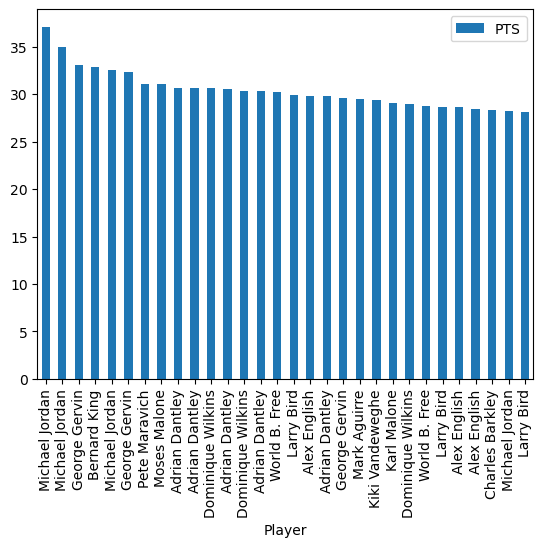

In [66]:
highest_scoring = df_players_80.sort_values("PTS", ascending=False).head(30)
highest_scoring.plot.bar("Player", "PTS")

## Early to mid-90s

### Scoring - Top 30 

<Axes: xlabel='Player'>

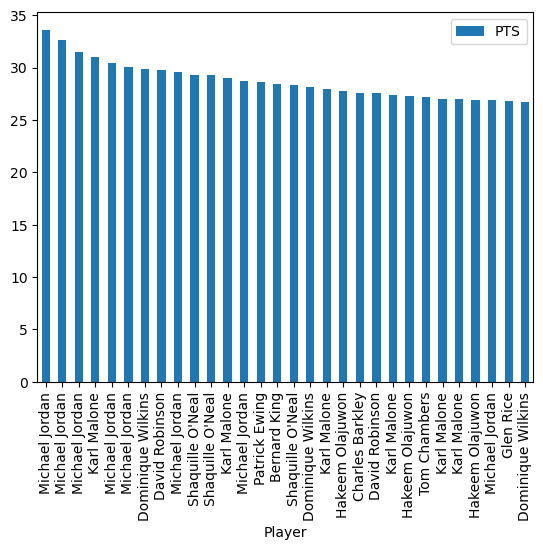

In [67]:
highest_scoring = df_players_90earlymid.sort_values("PTS", ascending=False).head(30)
highest_scoring.plot.bar("Player", "PTS")

## Late-90s to early 00s


### Scoring - Top 30 

<Axes: xlabel='Player'>

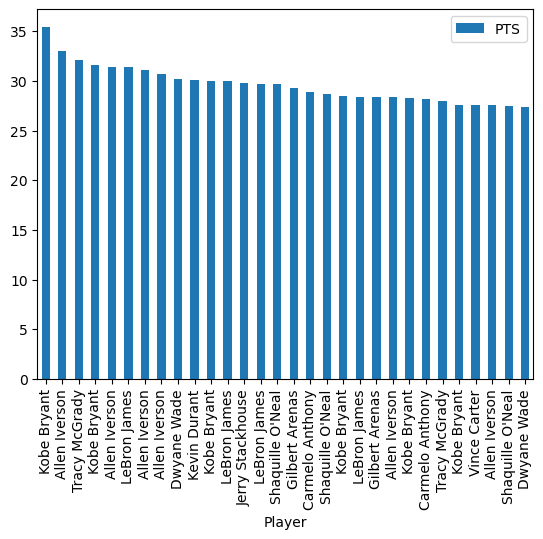

In [68]:


highest_scoring = df_players_00earlymid.sort_values("PTS", ascending=False).head(30)
highest_scoring.plot.bar("Player", "PTS")

### 10 eras



### Scoring - Top 30 

<Axes: xlabel='Player'>

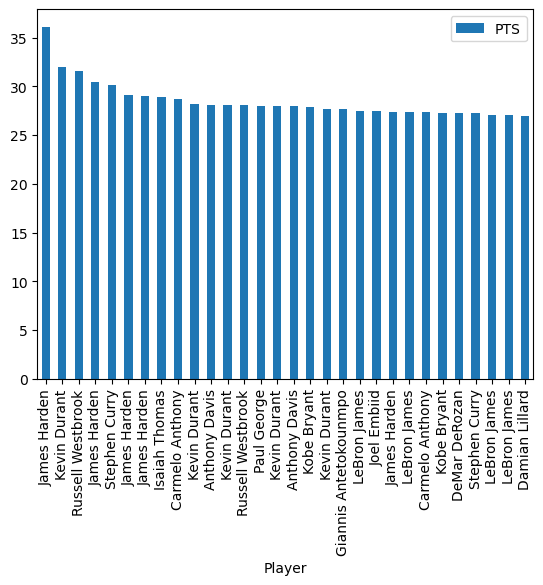

In [69]:

highest_scoring = df_players_10s.sort_values("PTS", ascending=False).head(30)
highest_scoring.plot.bar("Player", "PTS")

## 20s Era 

### Scoring - Top 30 


<Axes: xlabel='Player'>

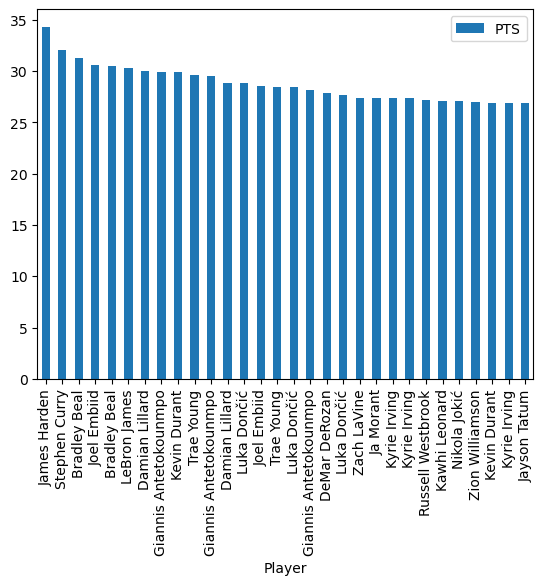

In [70]:

highest_scoring = df_players_20s.sort_values("PTS", ascending=False).head(30)
highest_scoring.plot.bar("Player", "PTS")

<Axes: xlabel='Player'>

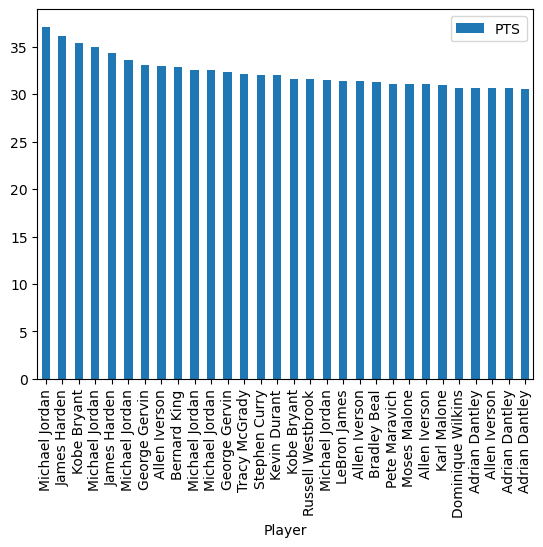

In [28]:
highest_scoring = df_players[df_players["G"] > 20].sort_values("PTS", ascending=False).head(30)

highest_scoring.plot.bar("Player", "PTS")


<Axes: xlabel='Player'>

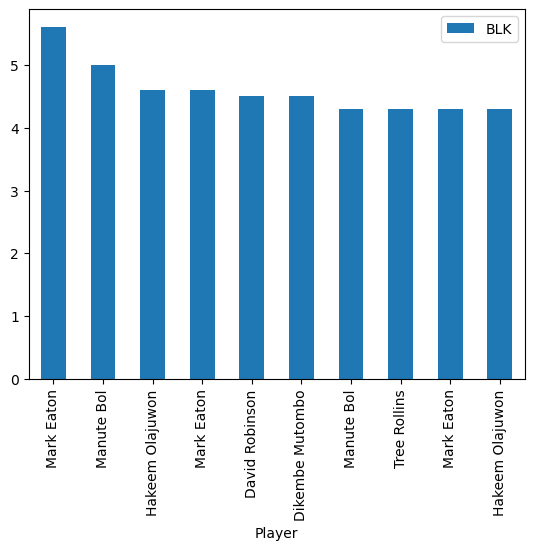

In [12]:
highest_blocking = df_players[df_players["G"] > 20].sort_values("BLK", ascending=False).head(10)

highest_blocking.plot.bar("Player", "BLK")

<Axes: xlabel='Player'>

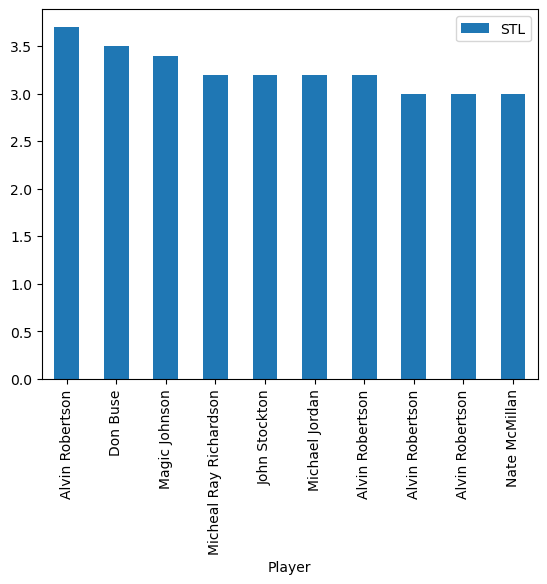

In [8]:
highest_stealing = df[df["G"] > 20].sort_values("STL", ascending=False).head(10)

highest_stealing.plot.bar("Player", "STL")

In [9]:
highest_scoring_by_year = df.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

In [10]:
type(highest_scoring_by_year)

pandas.core.frame.DataFrame

<Axes: xlabel='Year'>

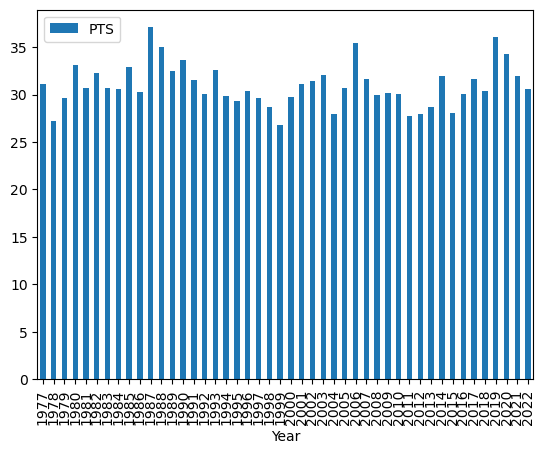

In [11]:
highest_scoring_by_year.plot.bar("Year", "PTS")

In [12]:
highest_scoring_by_team = df.groupby("Team").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<Axes: xlabel='Team'>

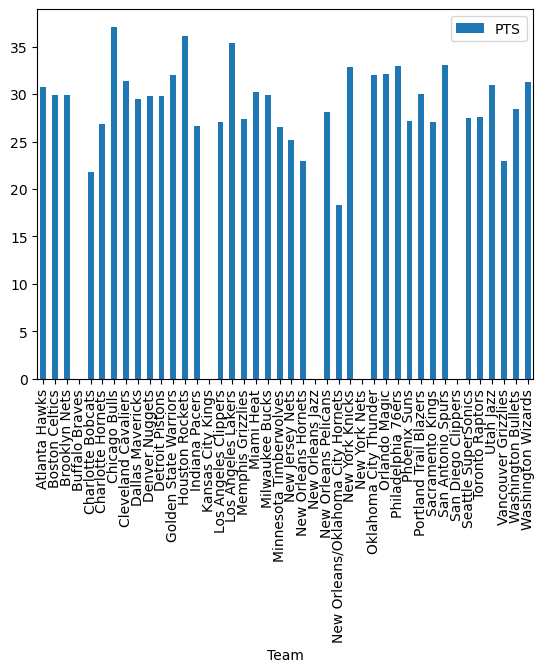

In [13]:
highest_scoring_by_team.plot.bar("Team", "PTS")

In [14]:
highest_scoring_by_age = df.groupby("Age").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<Axes: xlabel='Age'>

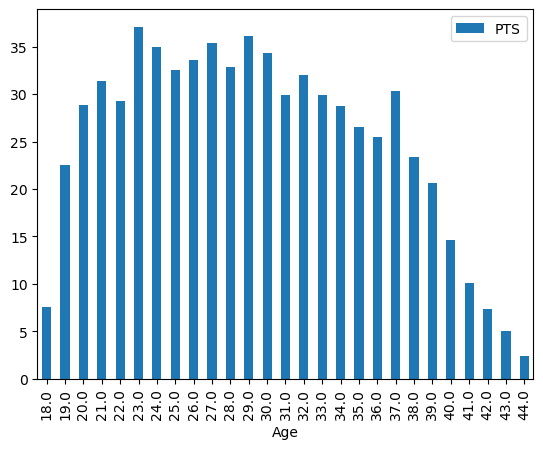

In [15]:
highest_scoring_by_age.plot.bar("Age", "PTS")

In [16]:
highest_scoring_by_position = df.groupby("Pos").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<Axes: xlabel='Pos'>

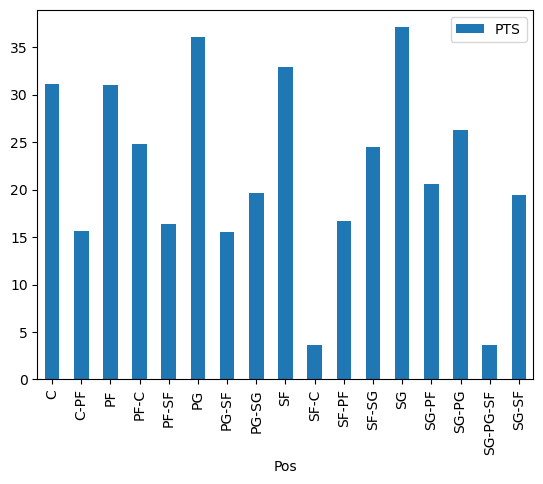

In [17]:
highest_scoring_by_position.plot.bar("Pos", "PTS")

In [18]:
average_scoring_by_position = df.groupby("Pos").mean()

C:\Users\ruwin\AppData\Local\Temp\ipykernel_21288\2687903373.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scoring_by_position = df.groupby("Pos").mean()


<Axes: xlabel='Pos'>

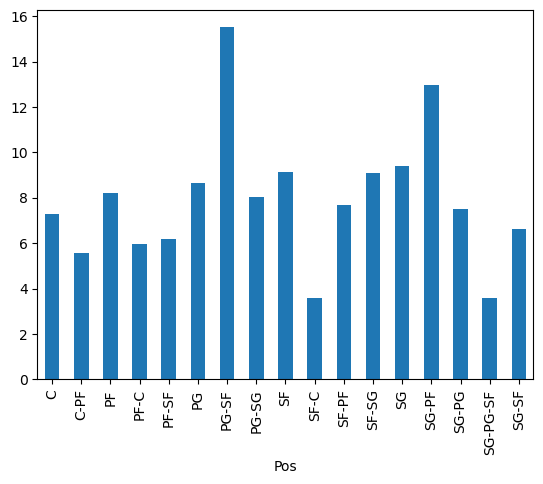

In [24]:
average_scoring_by_position['PTS'].plot.bar()

<Axes: xlabel='Pos'>

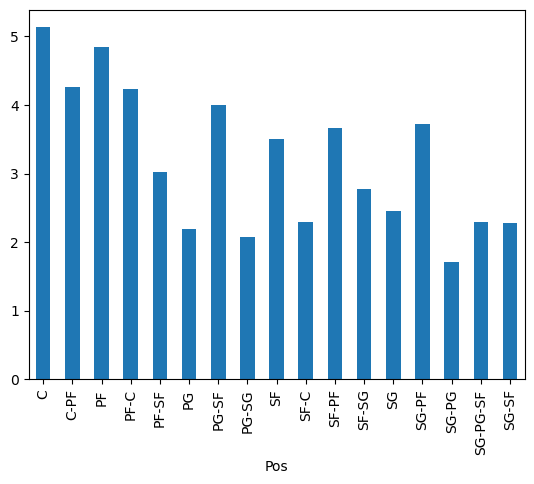

In [25]:
average_scoring_by_position['TRB'].plot.bar()

In [28]:
average_scoring_by_year = df.groupby("Year").mean()

C:\Users\ruwin\AppData\Local\Temp\ipykernel_21288\2118644952.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scoring_by_year = df.groupby("Year").mean()


<Axes: xlabel='Year'>

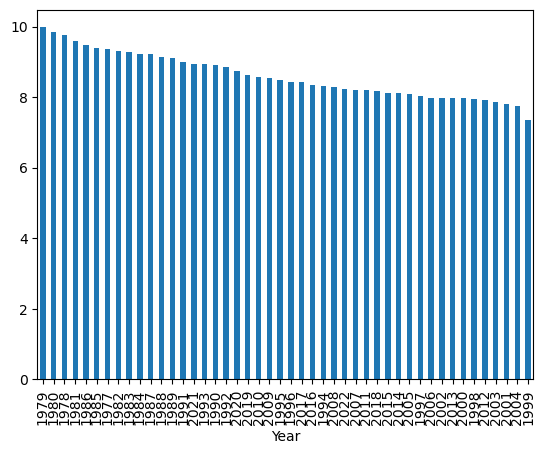

In [38]:
average_scoring_by_year['PTS'].sort_values(ascending=False).plot.bar()

In [30]:
average_scoring_by_team = df.groupby("Team").mean()

C:\Users\ruwin\AppData\Local\Temp\ipykernel_21288\961689865.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_scoring_by_team = df.groupby("Team").mean()


<Axes: xlabel='Team'>

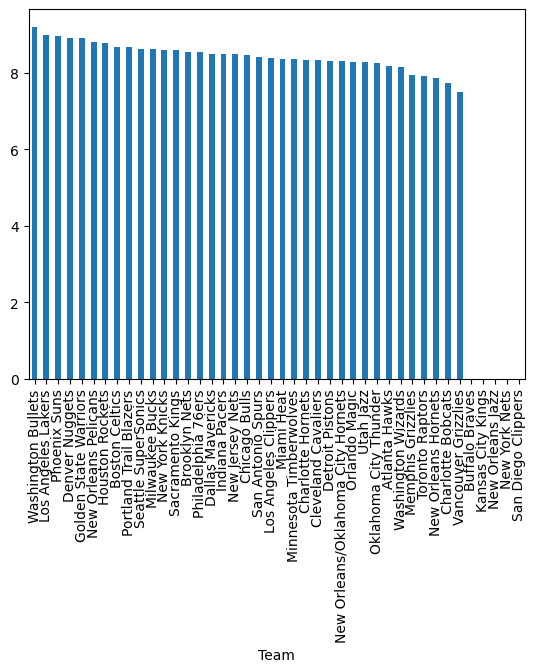

In [37]:
average_scoring_by_team['PTS'].sort_values(ascending=False).plot.bar()

<Axes: xlabel='Team'>

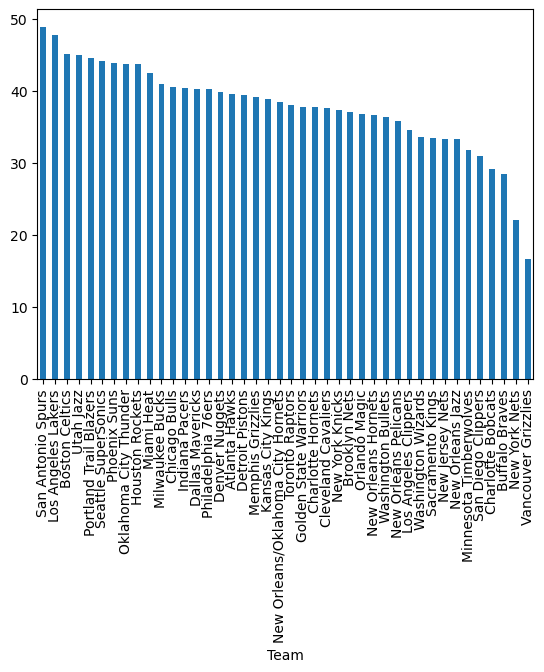

In [40]:
average_scoring_by_team['W'].sort_values(ascending=False).plot.bar()